In [2]:
import json;
import pandas as pd;
import scipy;
from scipy import stats;
# from apyori import apriori;
import matplotlib.pyplot as plt;
import numpy as np;
df = pd.read_csv("okcupid_profiles.csv"); # , lines=True, chunksize=10000000

In [2]:
df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,...,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59942,24,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,"white, other",...,i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.
59943,42,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,asian,...,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively - getting thin...,i'm quiet until i get used to the environment ...,"last book: ""game change"". movies

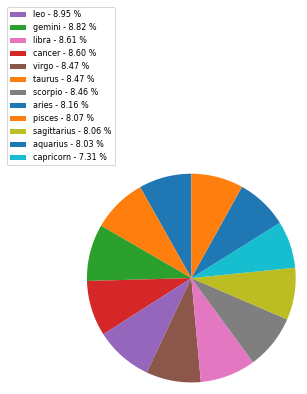

48890 entries
{'aries': 3989, 'taurus': 4140, 'gemini': 4310, 'cancer': 4206, 'leo': 4374, 'virgo': 4141, 'libra': 4207, 'scorpio': 4134, 'sagittarius': 3942, 'capricorn': 3573, 'aquarius': 3928, 'pisces': 3946}


In [3]:
sign_dict = {'aries': 0, 'taurus': 0, 'gemini': 0, 'cancer': 0, 'leo': 0, 'virgo': 0, 'libra': 0, 'scorpio': 0, 'sagittarius': 0, 'capricorn': 0, 'aquarius': 0, 'pisces': 0 }
# copy hist for'ethnicity', ('age' vs. 'offspring')
for key in sign_dict:
    for entry in df.loc[:, 'sign']:
        if str(entry) == entry and key in entry:
            sign_dict[key] += 1

x = sign_dict.keys()
y = sign_dict.values()
porcent = list(map(lambda x: x*100, y))
sum_y = sum(y)
alf = lambda x,y: list(map(lambda x2: x2/y, x))
porcent = alf(porcent, sum_y)
patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.show()
print(f'{sum(sign_dict.values())} entries')
print(sign_dict)

#Maybe Useful Later:
#### list(filter(lambda x : x > 10 and x < 20, listofNum))
#### map(lambda x: x + x, numbers)